In [40]:
import torch
import torch.optim as optim
from torch.autograd import Variable
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from torchvision import utils

### Get data

In [6]:
mnist = input_data.read_data_sets('../dataset/MNIST_data', one_hot=True)

Extracting ../dataset/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../dataset/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../dataset/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../dataset/MNIST_data/t10k-labels-idx1-ubyte.gz


In [51]:
mb_size = 64
Z_dim = 100
X_dim = mnist.train.images.shape[1]
y_dim = mnist.train.labels.shape[1]
h_dim = 128

### Hyperparams

In [33]:
c = 0
lr = 1e-3

### Generator

### Discriminator

In [49]:
class SimpleNN(nn.Module):
    def __init__(self, batch_size, input_dim, h_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.W1 = nn.Parameter(torch.randn(input_dim, h_dim)*0.075)
        self.b1 = nn.Parameter(torch.randn(h_dim)*0.075)
        self.W2 = nn.Parameter(torch.randn(h_dim, output_dim)*0.075)
        self.b2 = nn.Parameter(torch.randn(output_dim)*0.075)

    def forward(self, X):
        h = F.relu(X.mm(self.W1) + self.b1.repeat(X.size(0), 1))
        z = h.mm(self.W2) + self.b2.repeat(h.size(0), 1)
        return F.sigmoid(z)

In [50]:
G = SimpleNN(mb_size, Z_dim, h_dim, X_dim)
D = SimpleNN(mb_size, X_dim, h_dim, 1)

In [43]:
G_solver = optim.Adam(G.parameters(), lr=1e-3)
D_solver = optim.Adam(D.parameters(), lr=1e-3)

In [44]:
ones_label = Variable(torch.ones(mb_size))
zeros_label = Variable(torch.zeros(mb_size))

In [54]:
criterion = F.binary_cross_entropy

In [114]:
for global_step  in range(100000):
    # Sample data
    z = Variable(torch.randn(mb_size, Z_dim))
    X, _ = mnist.train.next_batch(mb_size)
    X = Variable(torch.from_numpy(X))

    # Dicriminator forward-loss-backward-update
    G_sample = G(z)
    D_real = D(X)
    D_fake = D(G_sample)

    D_loss_real = criterion(D_real, ones_label)
    D_loss_fake = criterion(D_fake, zeros_label)
    D_loss = D_loss_real + D_loss_fake

    D_loss.backward()
    D_solver.step()

    # Housekeeping - reset gradient
    D.zero_grad()

    # Generator forward-loss-backward-update
    z = Variable(torch.randn(mb_size, Z_dim))
    G_sample = G(z)
    D_fake = D(G_sample)

    G_loss = criterion(D_fake, ones_label)

    G_loss.backward()
    G_solver.step()

    # Housekeeping - reset gradient
    G.zero_grad()
    # ======== DISPLAY PROGRESS ======== #
    if global_step % 100 == 0:
        print('step {}: D loss: {:.4f}; G loss: {:.4f}'
              .format(global_step, D_loss.data.numpy()[0], G_loss.data.numpy()[0]))

step 0: D loss: 1.6841; G loss: 0.4389
step 100: D loss: 1.6987; G loss: 0.4409
step 200: D loss: 1.6832; G loss: 0.4391
step 300: D loss: 1.6618; G loss: 0.4418
step 400: D loss: 1.7100; G loss: 0.4398
step 500: D loss: 1.6740; G loss: 0.4383
step 600: D loss: 1.6775; G loss: 0.4353
step 700: D loss: 1.6856; G loss: 0.4326
step 800: D loss: 1.6882; G loss: 0.4305
step 900: D loss: 1.7156; G loss: 0.4374
step 1000: D loss: 1.6516; G loss: 0.4410
step 1100: D loss: 1.6942; G loss: 0.4353
step 1200: D loss: 1.6657; G loss: 0.4378
step 1300: D loss: 1.7077; G loss: 0.4353
step 1400: D loss: 1.6877; G loss: 0.4388
step 1500: D loss: 1.7050; G loss: 0.4365
step 1600: D loss: 1.6939; G loss: 0.4260
step 1700: D loss: 1.7105; G loss: 0.4433
step 1800: D loss: 1.6713; G loss: 0.4424
step 1900: D loss: 1.6625; G loss: 0.4439
step 2000: D loss: 1.7031; G loss: 0.4386
step 2100: D loss: 1.7055; G loss: 0.4437
step 2200: D loss: 1.6950; G loss: 0.4401
step 2300: D loss: 1.7018; G loss: 0.4334
step

step 19400: D loss: 1.6865; G loss: 0.4342
step 19500: D loss: 1.6598; G loss: 0.4425
step 19600: D loss: 1.6825; G loss: 0.4319
step 19700: D loss: 1.7106; G loss: 0.4364
step 19800: D loss: 1.7030; G loss: 0.4356
step 19900: D loss: 1.6930; G loss: 0.4383
step 20000: D loss: 1.6928; G loss: 0.4385
step 20100: D loss: 1.6851; G loss: 0.4404
step 20200: D loss: 1.6905; G loss: 0.4403
step 20300: D loss: 1.7011; G loss: 0.4334
step 20400: D loss: 1.6989; G loss: 0.4368
step 20500: D loss: 1.6956; G loss: 0.4351
step 20600: D loss: 1.6953; G loss: 0.4378
step 20700: D loss: 1.6723; G loss: 0.4458
step 20800: D loss: 1.6885; G loss: 0.4318
step 20900: D loss: 1.6805; G loss: 0.4336
step 21000: D loss: 1.6653; G loss: 0.4312
step 21100: D loss: 1.7115; G loss: 0.4324
step 21200: D loss: 1.6971; G loss: 0.4458
step 21300: D loss: 1.7079; G loss: 0.4334
step 21400: D loss: 1.7076; G loss: 0.4471
step 21500: D loss: 1.6929; G loss: 0.4421
step 21600: D loss: 1.7145; G loss: 0.4394
step 21700:

step 38500: D loss: 1.7055; G loss: 0.4385
step 38600: D loss: 1.6714; G loss: 0.4378
step 38700: D loss: 1.6331; G loss: 0.4479
step 38800: D loss: 1.6929; G loss: 0.4410
step 38900: D loss: 1.6730; G loss: 0.4395
step 39000: D loss: 1.7146; G loss: 0.4355
step 39100: D loss: 1.6707; G loss: 0.4342
step 39200: D loss: 1.6843; G loss: 0.4479
step 39300: D loss: 1.6649; G loss: 0.4490
step 39400: D loss: 1.7088; G loss: 0.4390
step 39500: D loss: 1.7186; G loss: 0.4440
step 39600: D loss: 1.7247; G loss: 0.4342
step 39700: D loss: 1.6866; G loss: 0.4278
step 39800: D loss: 1.6966; G loss: 0.4351
step 39900: D loss: 1.6765; G loss: 0.4338
step 40000: D loss: 1.7107; G loss: 0.4371
step 40100: D loss: 1.7273; G loss: 0.4352
step 40200: D loss: 1.7134; G loss: 0.4389
step 40300: D loss: 1.6820; G loss: 0.4418
step 40400: D loss: 1.6696; G loss: 0.4455
step 40500: D loss: 1.6772; G loss: 0.4303
step 40600: D loss: 1.7262; G loss: 0.4424
step 40700: D loss: 1.7065; G loss: 0.4393
step 40800:

step 57600: D loss: 1.7076; G loss: 0.4473
step 57700: D loss: 1.6830; G loss: 0.4370
step 57800: D loss: 1.6809; G loss: 0.4390
step 57900: D loss: 1.6697; G loss: 0.4335
step 58000: D loss: 1.6926; G loss: 0.4419
step 58100: D loss: 1.6859; G loss: 0.4390
step 58200: D loss: 1.6829; G loss: 0.4423
step 58300: D loss: 1.6980; G loss: 0.4358
step 58400: D loss: 1.6987; G loss: 0.4390
step 58500: D loss: 1.6841; G loss: 0.4332
step 58600: D loss: 1.6746; G loss: 0.4321
step 58700: D loss: 1.6858; G loss: 0.4360
step 58800: D loss: 1.6983; G loss: 0.4311
step 58900: D loss: 1.7014; G loss: 0.4401
step 59000: D loss: 1.6815; G loss: 0.4356
step 59100: D loss: 1.6865; G loss: 0.4321
step 59200: D loss: 1.6836; G loss: 0.4351
step 59300: D loss: 1.7092; G loss: 0.4380
step 59400: D loss: 1.6834; G loss: 0.4449
step 59500: D loss: 1.6861; G loss: 0.4402
step 59600: D loss: 1.6630; G loss: 0.4395
step 59700: D loss: 1.6918; G loss: 0.4366
step 59800: D loss: 1.7491; G loss: 0.4372
step 59900:

step 76700: D loss: 1.6831; G loss: 0.4364
step 76800: D loss: 1.6608; G loss: 0.4384
step 76900: D loss: 1.7095; G loss: 0.4366
step 77000: D loss: 1.6717; G loss: 0.4397
step 77100: D loss: 1.7035; G loss: 0.4480
step 77200: D loss: 1.6990; G loss: 0.4371
step 77300: D loss: 1.6792; G loss: 0.4430
step 77400: D loss: 1.6989; G loss: 0.4400
step 77500: D loss: 1.6843; G loss: 0.4339
step 77600: D loss: 1.6996; G loss: 0.4407
step 77700: D loss: 1.7052; G loss: 0.4358
step 77800: D loss: 1.6735; G loss: 0.4376
step 77900: D loss: 1.7041; G loss: 0.4440
step 78000: D loss: 1.7058; G loss: 0.4415
step 78100: D loss: 1.6764; G loss: 0.4335
step 78200: D loss: 1.6852; G loss: 0.4405
step 78300: D loss: 1.7090; G loss: 0.4364
step 78400: D loss: 1.6575; G loss: 0.4372
step 78500: D loss: 1.7100; G loss: 0.4507
step 78600: D loss: 1.6828; G loss: 0.4391
step 78700: D loss: 1.6814; G loss: 0.4393
step 78800: D loss: 1.6598; G loss: 0.4525
step 78900: D loss: 1.6881; G loss: 0.4497
step 79000:

step 95800: D loss: 1.6885; G loss: 0.4393
step 95900: D loss: 1.7058; G loss: 0.4312
step 96000: D loss: 1.6751; G loss: 0.4450
step 96100: D loss: 1.6609; G loss: 0.4368
step 96200: D loss: 1.6961; G loss: 0.4363
step 96300: D loss: 1.6799; G loss: 0.4334
step 96400: D loss: 1.6838; G loss: 0.4372
step 96500: D loss: 1.6856; G loss: 0.4373
step 96600: D loss: 1.6687; G loss: 0.4431
step 96700: D loss: 1.6742; G loss: 0.4305
step 96800: D loss: 1.7248; G loss: 0.4354
step 96900: D loss: 1.6686; G loss: 0.4422
step 97000: D loss: 1.7111; G loss: 0.4445
step 97100: D loss: 1.6833; G loss: 0.4442
step 97200: D loss: 1.7031; G loss: 0.4351
step 97300: D loss: 1.6759; G loss: 0.4418
step 97400: D loss: 1.6876; G loss: 0.4410
step 97500: D loss: 1.6922; G loss: 0.4318
step 97600: D loss: 1.7034; G loss: 0.4447
step 97700: D loss: 1.6862; G loss: 0.4348
step 97800: D loss: 1.6823; G loss: 0.4388
step 97900: D loss: 1.6747; G loss: 0.4418
step 98000: D loss: 1.7098; G loss: 0.4434
step 98100:

In [110]:
z = Variable(torch.randn(mb_size, Z_dim))
sample = G(z).data.resize_(64, 28, 28)

In [112]:
# x = torch.from_numpy(sample)
out = utils.make_grid(sample)

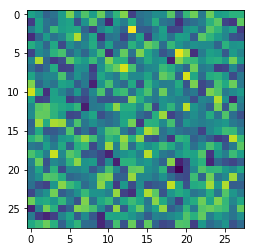

In [113]:
# fig = plt.figure(figsize=(5, 5))
i = out.numpy()
plt.imshow(i[0])
plt.show()